# Clustering Challenge

In [12]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
import numpy as np

In [13]:
# Reads the .csv file into variable df
df = pd.read_csv('../datasets/iris.csv')

# Separates the class variable in y
species = df.species

# Removes the y column from df
df = df.drop('species', axis=1)

# Standardizes df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

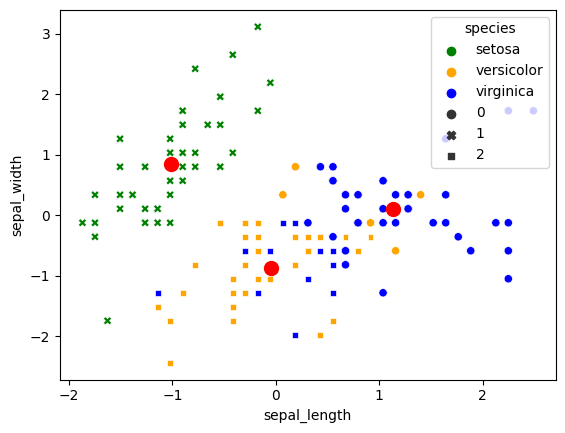

In [15]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=df, 
    hue=species,
    style=km.labels_,
    palette=["green", "orange", "blue"])
# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='o',
    s=100,
    c='red')

In [21]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,10)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(df)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

/Users/MakersAdmin/Documents/my_python_code/intro-to-data-analysis/intro_data_clone_venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/MakersAdmin/Documents/my_python_code/intro-to-data-analysis/intro_data_clone_venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/MakersAdmin/Documents/my_python_code/intro-to-data-analysis/intro_data_clone_venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MakersAdmin/Documents/my_python_code/intro-to-d

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

Text(0, 0.5, 'Silhouette Score')

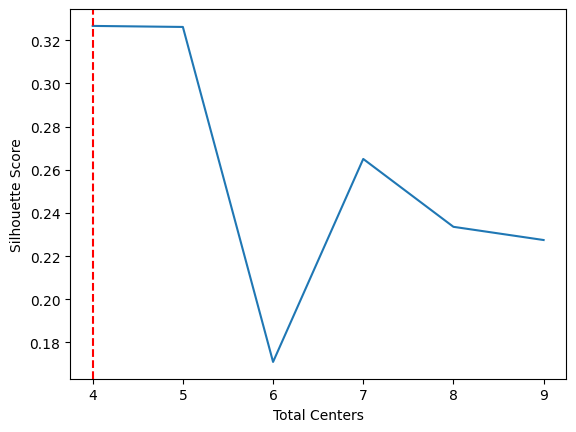

In [17]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters, 
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

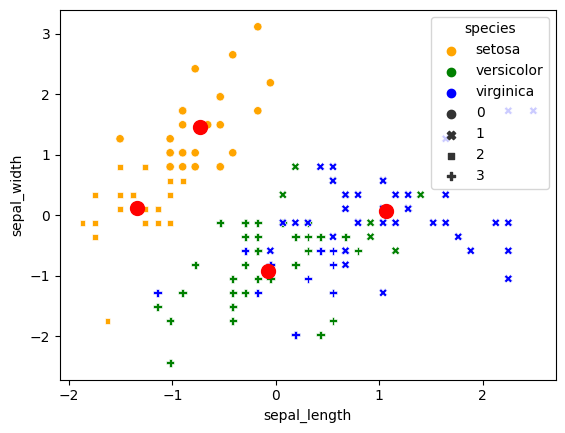

In [20]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=df, 
    hue=species,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='o',
    s=100,
    c='red')